Gabriel Riegner: 31 JAN 2024  

##### Homework Assignment 3

---

##### 1. Understanding Erdos-Renyi Networks

(a) $\langle L \rangle = p \frac{N(N-1)}{2} = 10^{-2} \frac{3000(3000-1)}{2} = 44985$  

(b) $\langle k \rangle = \frac{2 \langle L \rangle}{N} = \frac{2\cdot44985}{3000} = 29.99$  
Since $\langle k \rangle>1$ and $p>\frac{1}{N}$, we are in the **subcritical regime**  

(c) $p_C = \frac{1}{N} = \frac{1}{3000} \approx 0.0003$  

(d) For a network to have one component, $p > \frac{\ln  N}{N}$  so we solve $10^{-3} = \frac{\ln  N^{Cr}}{N^{Cr}}$ by numerical approximation (see code below)  
$\therefore N^{Cr} \approx 9118$  

(e) $\langle k^{Cr} \rangle = p(N^{Cr}-1) = 10^{-3}(9118 - 1) = 9.117$  and $\langle d \rangle \approx \frac{\ln N^{Cr}}{\ln  \langle k^{Cr} \rangle} = 4.125$  

(f) Given the Poisson form, $p_k = \text{exp}(-\langle k \rangle) \frac{\langle k \rangle^k}{k!} =  \text{exp}(-9.117) \frac{9.117^k}{k!}$

In [1]:
from scipy.optimize import fsolve
import numpy as np

eq = lambda N: np.log(N) / N - 1e-3
fsolve(eq, 3000)  # N = 3000 as initial guess

array([9118.0064704])

##### 2. Snobbish Networks

(a) $\langle k_\text{blue} \rangle = p (N-1)$ and $\langle k_\text{full} \rangle = p (N-1) + q(N)$  
because there are $N-1$ nodes of identical color w.p. $p$ and $N$ nodes of opposites color w.p. $q$

(b) The criteria $\langle k \rangle > \ln  2N$ is needed for the network to have just one component, therefore $p (N-1) + q(N) > \ln  2N$ or $(p+q) > \frac{\ln  2N}{N}$ for large $N$.

(c) The small-world property is $\langle d \rangle \approx \frac{\ln N}{\ln \langle k \rangle}$, where $\langle d \rangle$ represents average path lengths. In snobbish networks (1) $p >> q$ ensures short paths within color groups, (2) nonzero $q$ guarantees some inter-color links for large $N$, and (3) high intra-color connectivity dominates, minimizing the impact of longer inter-color paths on $\langle d \rangle$.

##### 3. Generatng Erdos-Renyi Networks

In the Erdos-Renyi model, increasing $p$ increases $\langle k \rangle$ and $\langle C \rangle$ almost linearly, and decreases $\langle d \rangle$ (note that $\langle d \rangle$ is undefined for $p=0.01$ because some components remain isolated). Visually, increasing $p$ leads to higher clustering and shorter paths on average.

Text(0, 0.5, '$\\langle d \\rangle$')

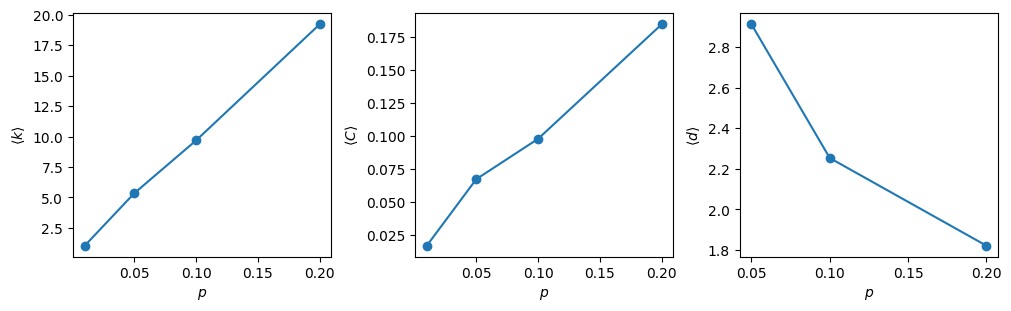

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

n = 100
ps = [0.01, 0.05, 0.1, 0.2]

df = {"G": [], "<k>": [], "<C>": [], "<d>": []}

for idx, p in enumerate(ps):
    G = nx.erdos_renyi_graph(n, p, seed=idx)
    df["G"].append(G)
    df["<k>"].append(np.mean([d for _, d in G.degree()]))
    df["<C>"].append(nx.average_clustering(G))
    if nx.is_connected(G):
        df["<d>"].append(nx.average_shortest_path_length(G))
    else:  # for small p
        df["<d>"].append(None)

fig, axs = plt.subplots(ncols=3, figsize=(10, 3), layout="constrained")

[ax.set_xlabel(r"$p$") for ax in axs]

# plot the average degree vs p
axs[0].plot(ps, df["<k>"], "o-")
axs[0].set_ylabel(r"$\langle k \rangle$")

# plot the clustering coefficient vs p
axs[1].plot(ps, df["<C>"], "o-")
axs[1].set_ylabel(r"$\langle C \rangle$")

# plot the averahe shortest path length vs p
axs[2].plot(ps, df["<d>"], "o-")
axs[2].set_ylabel(r"$\langle d \rangle$")

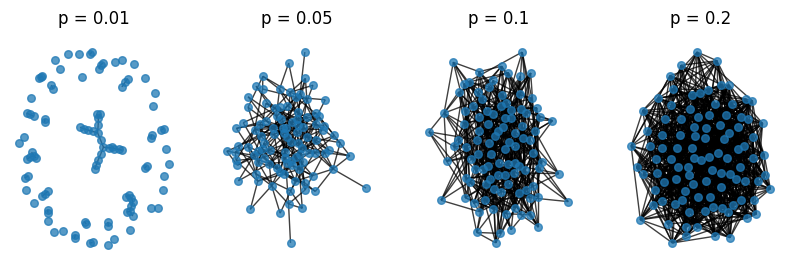

In [3]:
# visualize the networks
fig, axs = plt.subplots(ncols=4, figsize=(10, 3))

for idx, ax in enumerate(axs):
    ax.set_title(f"p = {ps[idx]}")
    nx.draw_spring(df["G"][idx], ax=ax, node_size=30, alpha=0.75)

##### 4. Generating Small World Networks

Average degree vs p: the average degree remains constant because each node starts with 4 connections (its 4-nereast neighbors) and rewiring only changes the destination of the link without altering their count.

Clustering coefficient vs p: increasing p decreases the clustering coefficient because local edges (which are part of triangles) with long-range connections, reducing the overall clustering.

Average shortest path length vs p: increasing p decrease the average shortest path length because introducing long-range connections reduces the average distances between node pairs. 

Compared with the Erdos-Renyi network above (where increaseing p increases average degree, clustering coefficient, and decreases average shortest path length), the Watts–Strogatz only alters the connections amon nodes without changing each nodes's fixed number of neighbors. Whereas connectivity in an ER graph scales with p (producing denser networks with higher degree and clustering), the WS model decouples these effects. 

Text(0, 0.5, '$\\langle d \\rangle$')

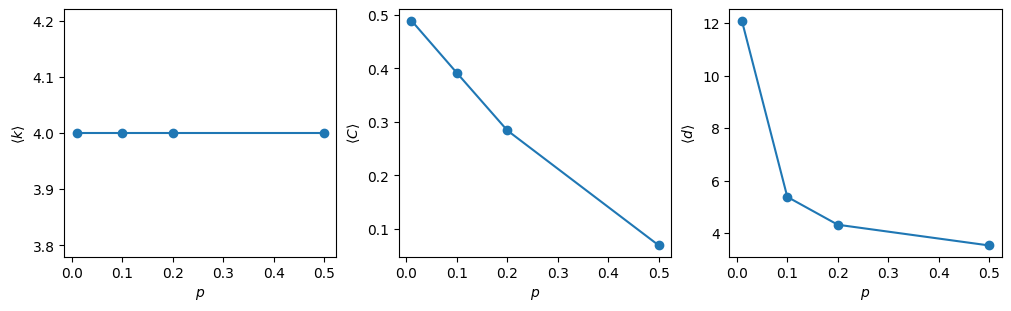

In [4]:
n = 100
k = 4
ps = [0.01, 0.1, 0.2, 0.5]

df = {"G": [], "<k>": [], "<C>": [], "<d>": []}

for idx, p in enumerate(ps):
    G = nx.watts_strogatz_graph(n, k, p, seed=4)
    df["G"].append(G)
    df["<k>"].append(np.mean([d for _, d in G.degree()]))
    df["<C>"].append(nx.average_clustering(G))
    if nx.is_connected(G):
        df["<d>"].append(nx.average_shortest_path_length(G))
    else:  # for small p
        df["<d>"].append(None)

fig, axs = plt.subplots(ncols=3, figsize=(10, 3), layout="constrained")

[ax.set_xlabel(r"$p$") for ax in axs]

# plot the average degree vs p
axs[0].plot(ps, df["<k>"], "o-")
axs[0].set_ylabel(r"$\langle k \rangle$")

# plot the clustering coefficient vs p
axs[1].plot(ps, df["<C>"], "o-")
axs[1].set_ylabel(r"$\langle C \rangle$")

# plot the averahe shortest path length vs p
axs[2].plot(ps, df["<d>"], "o-")
axs[2].set_ylabel(r"$\langle d \rangle$")

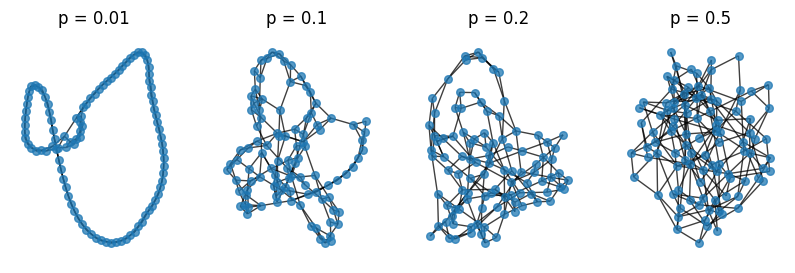

In [5]:
# visualize the networks
fig, axs = plt.subplots(ncols=4, figsize=(10, 3))

for idx, ax in enumerate(axs):
    ax.set_title(f"p = {ps[idx]}")
    nx.draw_spring(df["G"][idx], ax=ax, node_size=30, alpha=0.75)